In [1]:
# Importing necessary libraries

%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
from sklearn.cluster import KMeans
from scipy.spatial.distance import pdist,cdist
from scipy.stats import zscore
from sklearn.metrics import silhouette_score

In [2]:
# Reading the dataset
cars_df = pd.read_csv('cars-dataset.csv')

In [3]:
cars_df.head()

,car name,cyl,disp,hp,wt,acc,yr,mpg
0,chevrolet chevelle malibu,8,307.0,130,3504,12.0,70,18.0
1,buick skylark 320,8,350.0,165,3693,11.5,70,15.0
2,plymouth satellite,8,318.0,150,3436,11.0,70,18.0
3,amc rebel sst,8,304.0,150,3433,12.0,70,16.0
4,ford torino,8,302.0,140,3449,10.5,70,17.0


In [4]:
cars_df.shape

(398, 8)

In [5]:
cars_df.dtypes

car name     object
cyl           int64
disp        float64
hp           object
wt            int64
acc         float64
yr            int64
mpg         float64
dtype: object

## hp is countinuous column where as in the dataframe it is an object. That is because it has 6 values which are non integer. we need to convert those values with the median of the column

In [6]:
cars_df[cars_df['hp']== '?']

,car name,cyl,disp,hp,wt,acc,yr,mpg
32,ford pinto,4,98.0,?,2046,19.0,71,25.0
126,ford maverick,6,200.0,?,2875,17.0,74,21.0
330,renault lecar deluxe,4,85.0,?,1835,17.3,80,40.9
336,ford mustang cobra,4,140.0,?,2905,14.3,80,23.6
354,renault 18i,4,100.0,?,2320,15.8,81,34.5
374,amc concord dl,4,151.0,?,3035,20.5,82,23.0


In [7]:
#Replacing '?' with Nan in hp
cars_df['hp'].replace({'?':np.nan}, inplace = True)
#Imputing with the median
cars_df['hp'].fillna(cars_df['hp'].median(), inplace = True)
#Converting the hp column to int
cars_df['hp'] = cars_df['hp'].astype('int64')

In [8]:
cars_df.dtypes

car name     object
cyl           int64
disp        float64
hp            int64
wt            int64
acc         float64
yr            int64
mpg         float64
dtype: object

## Univariate analysis

C:\Users\arany\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


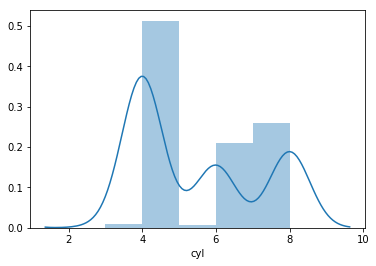

In [10]:
sns.distplot(cars_df['cyl'])

C:\Users\arany\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


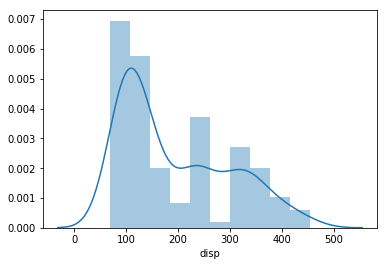

In [11]:
sns.distplot(cars_df['disp'])

C:\Users\arany\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


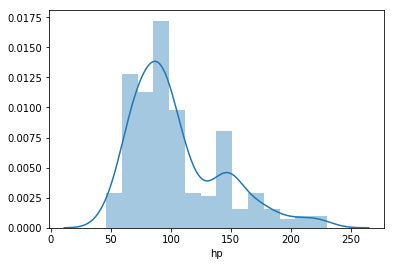

In [12]:
sns.distplot(cars_df['hp'])

C:\Users\arany\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


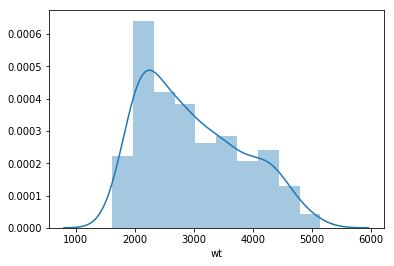

In [13]:
sns.distplot(cars_df['wt'])

C:\Users\arany\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


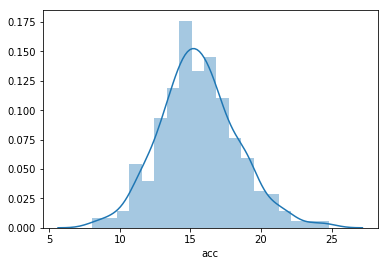

In [14]:
sns.distplot(cars_df['acc'])

C:\Users\arany\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


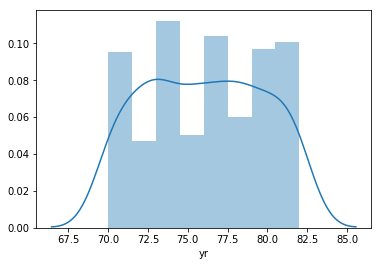

In [15]:
sns.distplot(cars_df['yr'])

C:\Users\arany\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


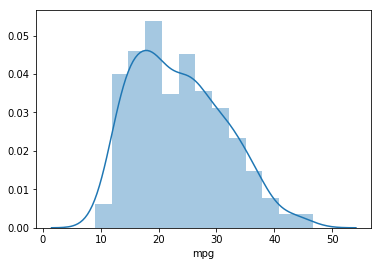

In [16]:
sns.distplot(cars_df['mpg'])

## Bivariate analysis

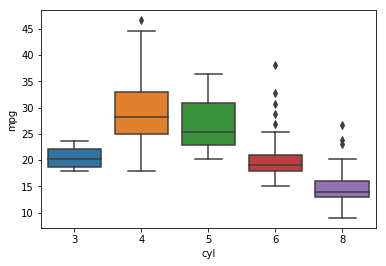

In [34]:
sns.boxplot(x='cyl',y='mpg',data=cars_df)

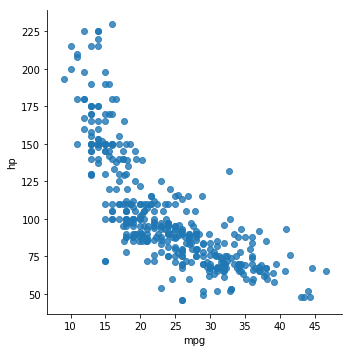

In [23]:
sns.lmplot(x='mpg',y='hp',data=cars_df,fit_reg=False)

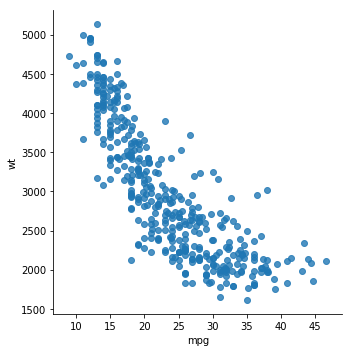

In [25]:
sns.lmplot(x='mpg',y='wt',data=cars_df,fit_reg=False)

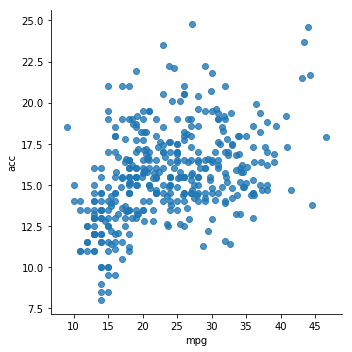

In [26]:
sns.lmplot(x='mpg',y='acc',data=cars_df,fit_reg=False)

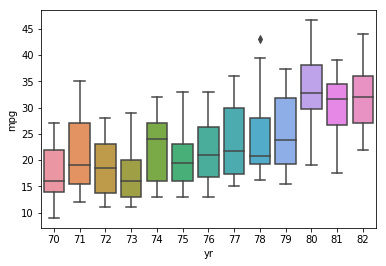

In [36]:
sns.boxplot(x='yr',y='mpg',data=cars_df)

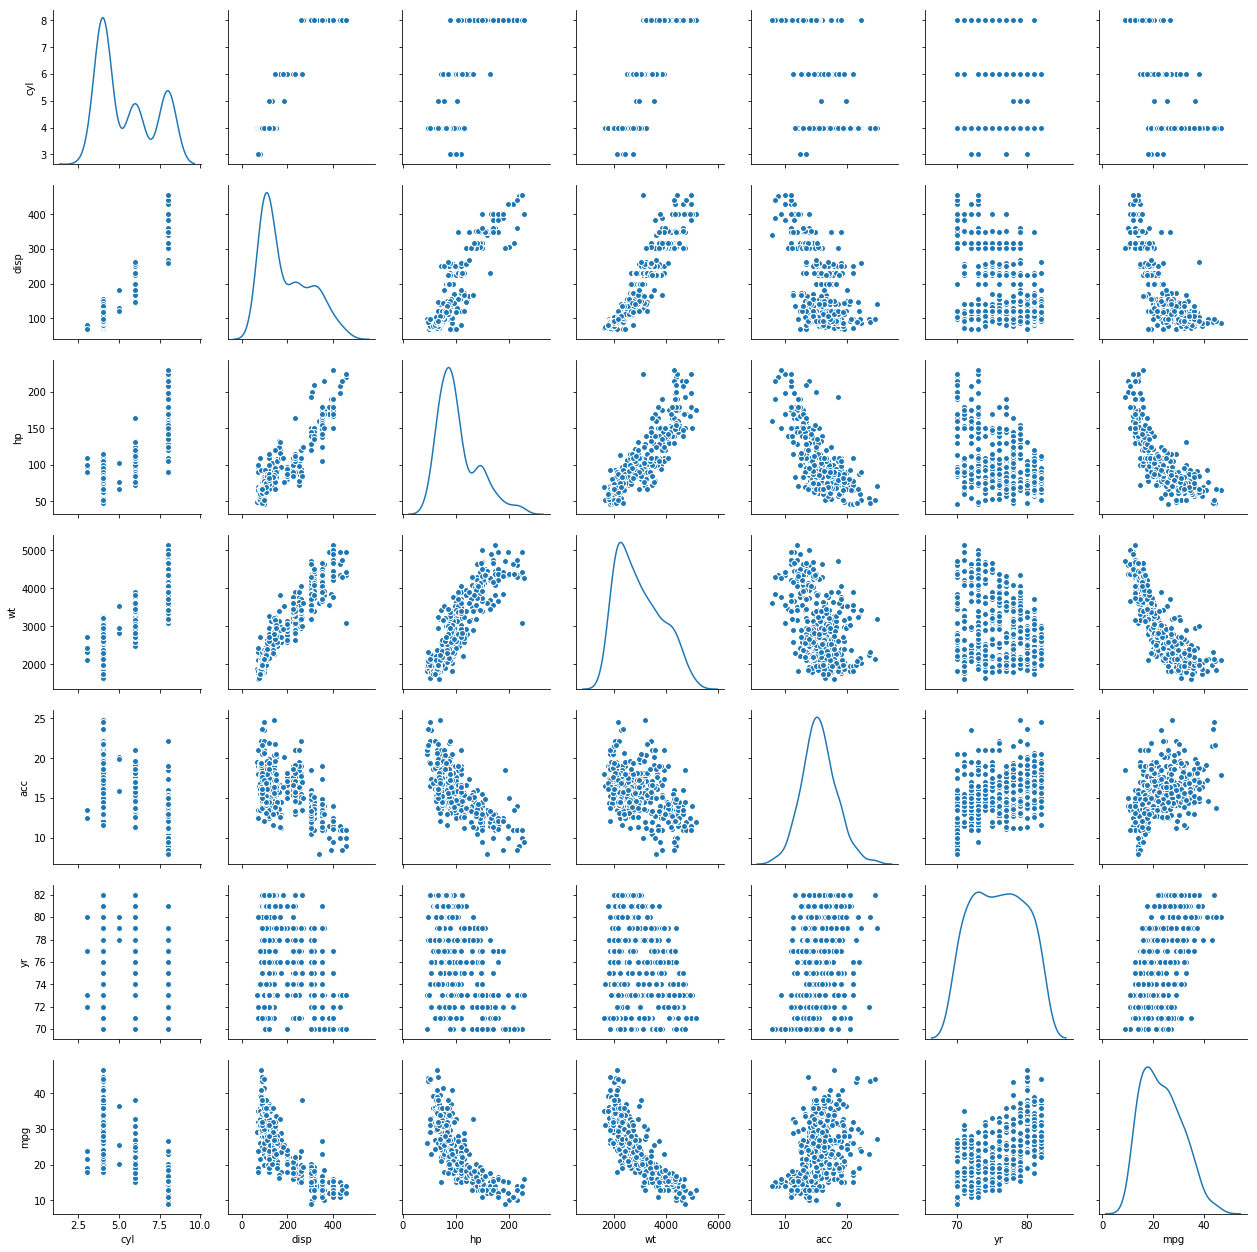

In [10]:
sns.pairplot(cars_df, diag_kind='kde')

### From the pairplots we can see there are clearly 3 peaks in one of the diagonals while most show 2 peaks. Hence we can infer, the probable value of K will range from 2 to 6

## Grouping Data into similar clusters

Now, we will use K-Means clustering to group data based on their attribute. First, we need to determine the optimal number of groups. For that we conduct the elbow test to see where the elbow happens.

In [11]:
cars_df_att = cars_df.drop("car name",axis=1)

In [12]:
cars_df_att_scaled=cars_df_att.apply(zscore)

In [12]:
cars_df_att_scaled_cluster2 = cars_df_att_scaled.copy()
cars_df_att_scaled_cluster3 = cars_df_att_scaled.copy()
cars_df_att_scaled_cluster4 = cars_df_att_scaled.copy()
cars_df_att_scaled_cluster5 = cars_df_att_scaled.copy()
cars_df_att_scaled_cluster6 = cars_df_att_scaled.copy()

In [15]:
inertia = []
silhouette_scores = []
for num_cluster in range(2,7):
    trial = KMeans(n_clusters=num_cluster)
    trial.fit(cars_df_att_scaled)
    inertia.append(trial.inertia_)
    cluster_labels = trial.predict(cars_df_att_scaled)
    silhouette_scores.append(silhouette_score(cars_df_att_scaled, cluster_labels))
    
cluster_df = pd.DataFrame(data=[np.arange(2,7,1), inertia, silhouette_scores]).T
cluster_df.columns =['Num_Clusters','Inertia','Silhouette_Score']

In [16]:
cluster_df

,Num_Clusters,Inertia,Silhouette_Score
0,2.0,1294.794927,0.482373
1,3.0,945.965952,0.353167
2,4.0,738.350652,0.348291
3,5.0,669.401871,0.317252
4,6.0,594.868613,0.274946


In [134]:
import seaborn as sns

Text(4,740,'<- Optimal Cluster')

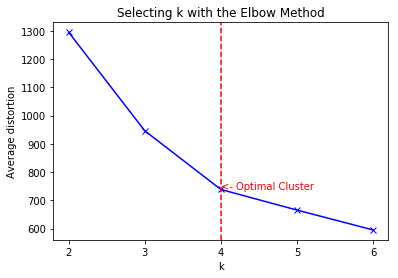

In [149]:
plt.plot(cluster_df['Num_Clusters'], cluster_df['Inertia'], 'bx-')
plt.xlabel('k')
plt.xticks(np.arange(2,7,1))
plt.ylabel('Average distortion')
plt.title('Selecting k with the Elbow Method')
plt.axvline(x = 4, linestyle = '--', color = 'red')
plt.text(x = 4, y = 740, s = '<- Optimal Cluster', color = 'red')

Text(4,0.348,'<- Min change from 3 cluster')

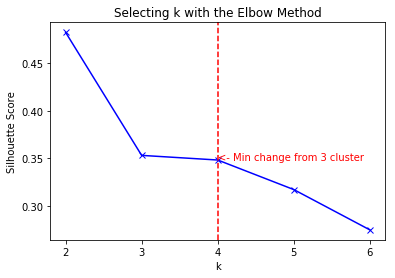

In [18]:
plt.plot(cluster_df['Num_Clusters'], cluster_df['Silhouette_Score'], 'bx-')
plt.xlabel('k')
plt.xticks(np.arange(2,7,1))
plt.ylabel('Silhouette Score')
plt.title('Selecting k with the Elbow Method')
plt.axvline(x = 4, linestyle = '--', color = 'red')
plt.text(x = 4, y = 0.348, s = '<- Min change from 3 cluster', color = 'red')

In [26]:
inertia

[1294.7949267265462,
 945.9659522847969,
 738.350652353918,
 669.4018707954458,
 594.868612611961]

In [20]:
silhouette_scores

[0.4823734420378295,
 0.3531671663867806,
 0.3482906124053297,
 0.31725245520623657,
 0.2749455115173566]

## Running the final Kmeans with K = 4

In [27]:
# Let us replace K with 4
final_KMeans=KMeans(4,random_state=1)
final_KMeans.fit(cars_df_att_scaled)
prediction=final_KMeans.predict(cars_df_att_scaled)

#Append the prediction 
cars_df_att_scaled["Clusters_4"] = prediction

In [28]:
cars_df_att_scaled["Clusters_4"].value_counts()

1    111
3    102
2     94
0     91
Name: Clusters_4, dtype: int64

In [ ]:
# creating 4 datasets for each cluster

# cars_df_clus1
# cars_df_clus2
# cars_df_clus3
# cars_df_clus4


In [43]:
# Cluster 1 dataframe
cars_df_clus1 = cars_df_att_scaled[cars_df_att_scaled['Clusters_4']== 0]
cars_df_clus1 = cars_df_clus1.drop('Clusters_4', axis =1)

# Cluster 2 dataframe
cars_df_clus2 = cars_df_att_scaled[cars_df_att_scaled['Clusters_4']== 1]
cars_df_clus2 = cars_df_clus2.drop('Clusters_4', axis =1)

# Cluster 3 dataframe
cars_df_clus3 = cars_df_att_scaled[cars_df_att_scaled['Clusters_4']== 2]
cars_df_clus3 = cars_df_clus3.drop('Clusters_4', axis =1)

# Cluster 4 dataframe
cars_df_clus4 = cars_df_att_scaled[cars_df_att_scaled['Clusters_4']== 3]
cars_df_clus4 = cars_df_clus4.drop('Clusters_4', axis =1)


In [49]:
print(cars_df_clus1.shape)
print(cars_df_clus2.shape)
print(cars_df_clus3.shape)
print(cars_df_clus4.shape)

(91, 7)
(111, 7)
(94, 7)
(102, 7)


## We will be running a linear regression model on each of the dataset for individual clusters to predict 'mpg' and would print out the coefficients for each model

#### Since the size of each of the individual cluster data frames are small, we will not be applying a train-test split on them. Rather we would pass the linear regression algorithm on the entire dataframe.

In [50]:
# Import Linear Regression machine learning library
from sklearn.linear_model import LinearRegression

# For Cluster 1

In [57]:
X1= cars_df_clus1.drop('mpg', axis =1)
y1= cars_df_clus1['mpg']

In [64]:
regression_model1 = LinearRegression()
regression_model1.fit(X1, y1)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [65]:
# Let us explore the coefficients for each of the independent attributes in cluster 1

for idx, col_name in enumerate(X1.columns):
    print("The coefficient for {} is {}".format(col_name, regression_model1.coef_[idx]))

The coefficient for cyl is 0.18479150452497303
The coefficient for disp is -0.01815284959711345
The coefficient for hp is -0.14822606879945174
The coefficient for wt is -0.3972684632543098
The coefficient for acc is -0.06266944244874717
The coefficient for yr is 0.22979476565444398


# For Cluster 2

In [66]:
X2= cars_df_clus2.drop('mpg', axis =1)
y2= cars_df_clus2['mpg']

In [67]:
regression_model2 = LinearRegression()
regression_model2.fit(X2, y2)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [68]:
# Let us explore the coefficients for each of the independent attributes in cluster 2

for idx, col_name in enumerate(X1.columns):
    print("The coefficient for {} is {}".format(col_name, regression_model2.coef_[idx]))

The coefficient for cyl is 1.0643285680563623
The coefficient for disp is -0.15203807497745855
The coefficient for hp is -0.28273662834926766
The coefficient for wt is -0.9363797796945799
The coefficient for acc is 0.11049315744301144
The coefficient for yr is 0.30619525886127796


# For Cluster 3

In [69]:
X3= cars_df_clus3.drop('mpg', axis =1)
y3= cars_df_clus3['mpg']

In [70]:
regression_model3 = LinearRegression()
regression_model3.fit(X3, y3)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [71]:
# Let us explore the coefficients for each of the independent attributes in cluster 2

for idx, col_name in enumerate(X1.columns):
    print("The coefficient for {} is {}".format(col_name, regression_model3.coef_[idx]))

The coefficient for cyl is 0.5465800592275271
The coefficient for disp is -0.07526251299013742
The coefficient for hp is -0.09303682181463421
The coefficient for wt is -0.11922235866808588
The coefficient for acc is -0.18322648271071346
The coefficient for yr is 0.18130081667733666


# For Cluster 4

In [72]:
X4= cars_df_clus4.drop('mpg', axis =1)
y4= cars_df_clus4['mpg']

In [73]:
regression_model4 = LinearRegression()
regression_model4.fit(X4, y4)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [74]:
# Let us explore the coefficients for each of the independent attributes in cluster 2

for idx, col_name in enumerate(X1.columns):
    print("The coefficient for {} is {}".format(col_name, regression_model4.coef_[idx]))

The coefficient for cyl is 0.8591149996976246
The coefficient for disp is -0.6652004324523183
The coefficient for hp is -0.20506210518394358
The coefficient for wt is -0.5409132467541946
The coefficient for acc is -0.08280759917234819
The coefficient for yr is 0.16184671348982163
